In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
df = pd.read_csv('Mall_Customers.csv')

In [33]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [34]:
df.rename(columns={'Gender':'gender','Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace=True)

In [35]:
df

,CustomerID,gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [36]:
df.isnull().sum()

CustomerID    0
gender        0
Age           0
income        0
score         0
dtype: int64

In [37]:
df.describe()

,CustomerID,Age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


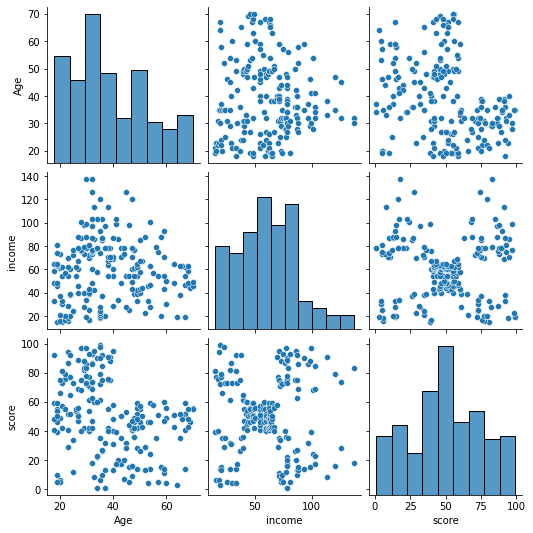

In [38]:
sns.pairplot(df[['Age','income','score']])

# K means Cluster

In [39]:
import sklearn.cluster as cluster

In [40]:
kmeans = cluster.KMeans(n_clusters=5)

In [41]:
kmeans = kmeans.fit(df[['score','income']])

In [42]:
kmeans

KMeans(n_clusters=5)

In [43]:
kmeans.cluster_centers_

array([[17.11428571, 88.2       ],
       [79.36363636, 25.72727273],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ]])

In [44]:
df['income_clusters_'] = kmeans.labels_

In [45]:
df

,CustomerID,gender,Age,income,score,income_clusters_
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [46]:
df['income_clusters_'].value_counts()

4    81
2    39
0    35
3    23
1    22
Name: income_clusters_, dtype: int64

<AxesSubplot:xlabel='income', ylabel='score'>

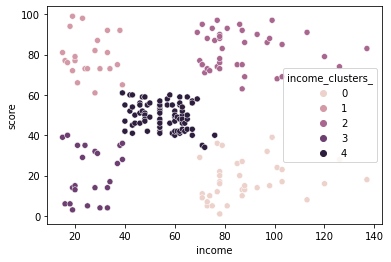

In [47]:
sns.scatterplot(x='income',y='score',hue='income_clusters_',data=df)

# Score and Age

In [48]:
kmeans = cluster.KMeans(n_clusters=2)

In [49]:
kmeans = kmeans.fit(df[['Age','score']])

In [50]:
kmeans.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [51]:
df['Age_clusters_'] = kmeans.labels_

In [52]:
df

,CustomerID,gender,Age,income,score,income_clusters_,Age_clusters_
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,3,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0
196,197,Female,45,126,28,0,1
197,198,Male,32,126,74,2,0
198,199,Male,32,137,18,0,1


In [53]:
df['Age_clusters_'].value_counts()

1    115
0     85
Name: Age_clusters_, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='score'>

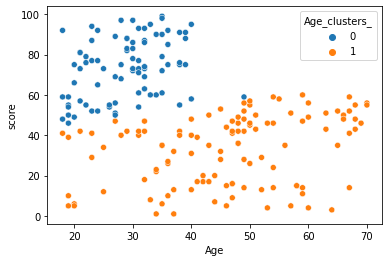

In [54]:
sns.scatterplot(x='Age',y='score',hue='Age_clusters_',data=df)

# Elbow Method

In [55]:
from sklearn.cluster import KMeans

In [56]:
k_range = range(1,12)
wcss = []

In [58]:
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['income','score']])
    wcss.append(km.inertia_)

C:\Users\shari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [59]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30273.394312070028,
 25029.25342493588,
 21862.09267218289,
 20127.706483876762,
 17609.079420937494]

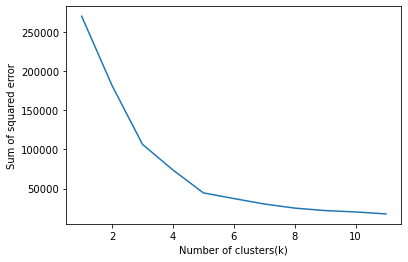

In [61]:
plt.xlabel('Number of clusters(k)')
plt.ylabel('Sum of squared error')
plt.plot(k_range,wcss)